In [1]:
path_root = r"C:/Users/jgpg000.edu/Desktop/LIBERAR TFM/"
ruta_grafico = f"{path_root}/testing/figures_test/"
# ruta clases personalizadas
import sys
path_classes = f"{path_root}classes"
sys.path.append(path_classes)

## LIBRERIAS
from class_dataset import *
from fun_graphics import *

# Cargar df con datos modelos
import pandas as pd
df = pd.read_excel(f"{path_root}responses_test/excel/metricasmodelos-Q16.xlsx")


Figuras de todos los estudios que se han hecho organizadas por experimento

### Embedding Small vs Large

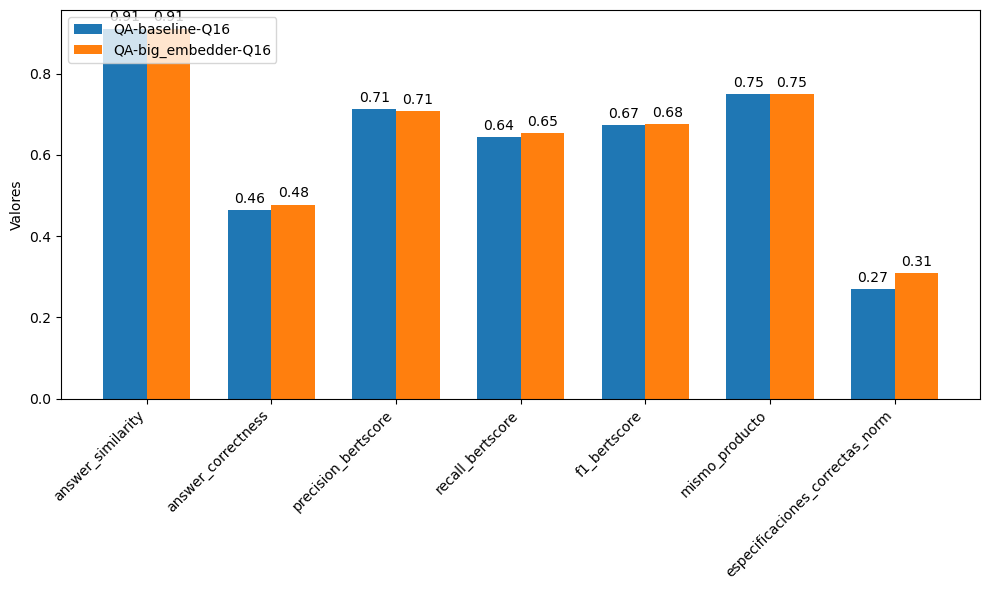

In [3]:
experimento1 = "baseline"
experimento2 = "big_embedder"
grafico_comparacion(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", ruta_grafico=ruta_grafico)

### Traducción de la base de datos al español

Nombrar que ahora tomamos como referencia (baseline) el modelo en español-large.

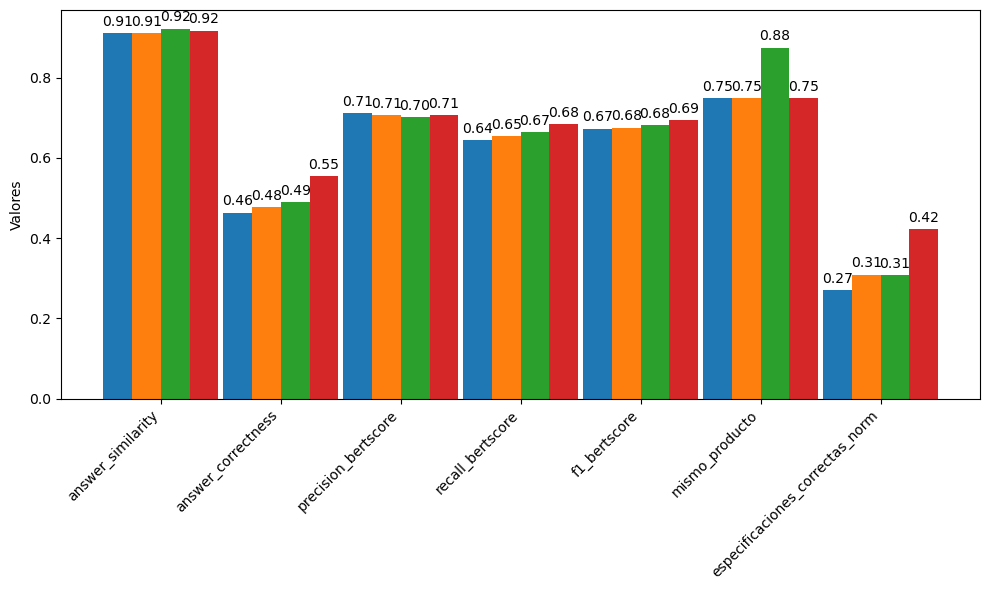

In [3]:
experimento1 = "baseline"
experimento2 = "big_embedder"
experimento3 = "baseline_esp"
experimento4 = "baseline_esp_large"
grafico_comparacion4(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", f"QA-{experimento3}-Q16", f"QA-{experimento4}-Q16", ruta_grafico)

### Filtro sobre materiales

Estudiar alguna respuesta en detalle para justificar la empeora de las métricas.

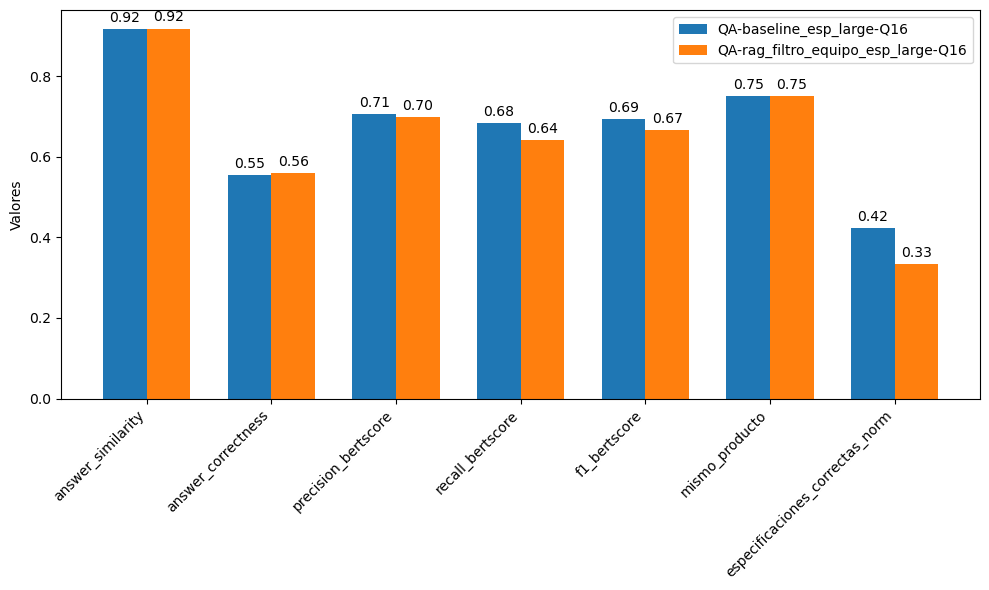

In [5]:
experimento1 = "baseline_esp_large"
experimento2 = "rag_filtro_equipo_esp_large"
grafico_comparacion(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", ruta_grafico)

### Elección de producto en función de la moda

Explicar la metodología de moda local y global.

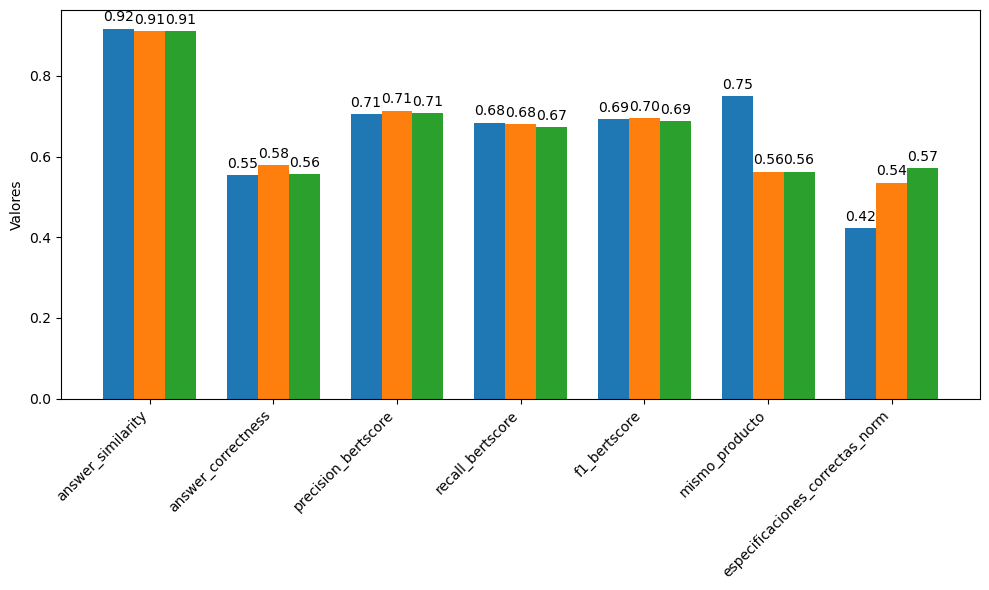

In [6]:
experimento1 = "baseline_esp_large"
experimento2 = "moda_producto_local"
experimento3 = "moda_producto_global"

grafico_comparacion3(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", f"QA-{experimento3}-Q16", ruta_grafico)

### Parent retriever. Límites del modelo en función de la base de datos.


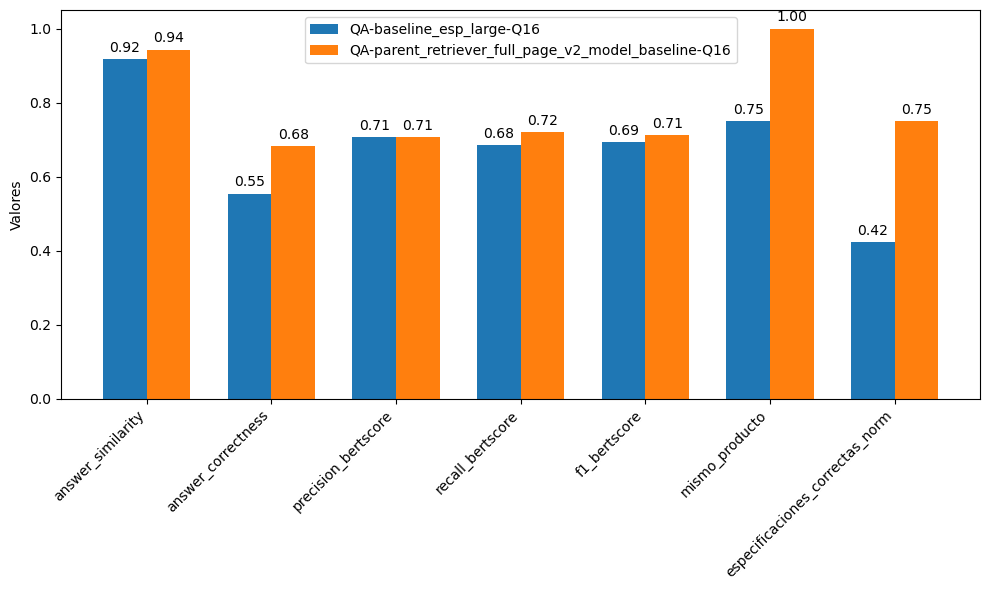

In [7]:
experimento1 = "baseline_esp_large"
experimento2 = "parent_retriever_full_page_v2_model_baseline"

grafico_comparacion(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", ruta_grafico)

### Variaciones del parent retriever

Comparamos en esta subsección el uso de fragmentos más grandes como padres contra el uso de documentos completos. Se consideran documentos tanto todo el texto plano de una hoja de especificaciones como el resumen de una tabla.

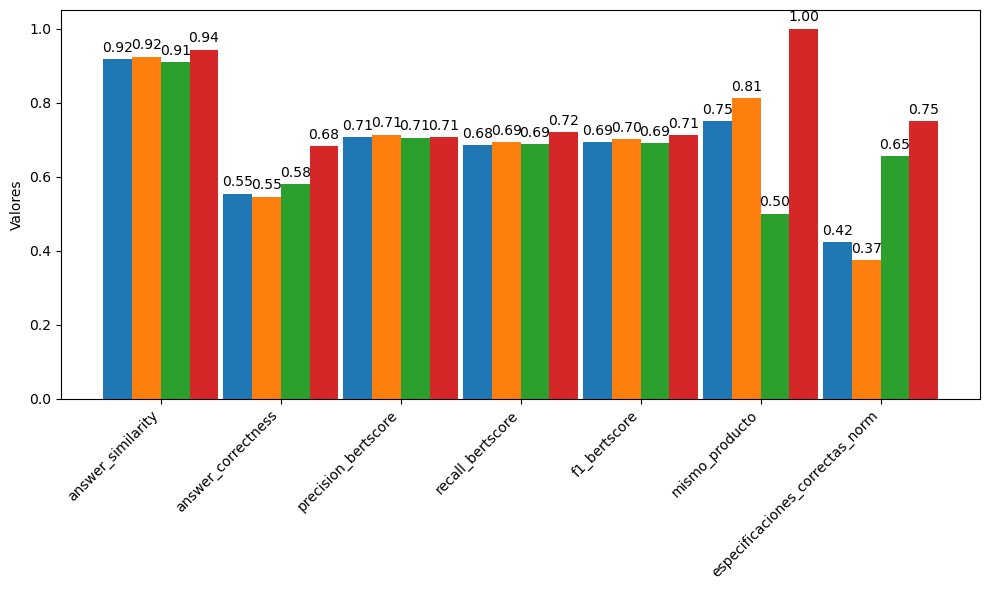

In [8]:
experimento1 = "baseline_esp_large"
experimento2 = "parent_retriever"
experimento3 = "parent_retriever_full_page_v2"
experimento4 = "parent_retriever_full_page_v2_model_baseline"

grafico_comparacion4(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", f"QA-{experimento3}-Q16", f"QA-{experimento4}-Q16", ruta_grafico)

### Incorporación de un reranker

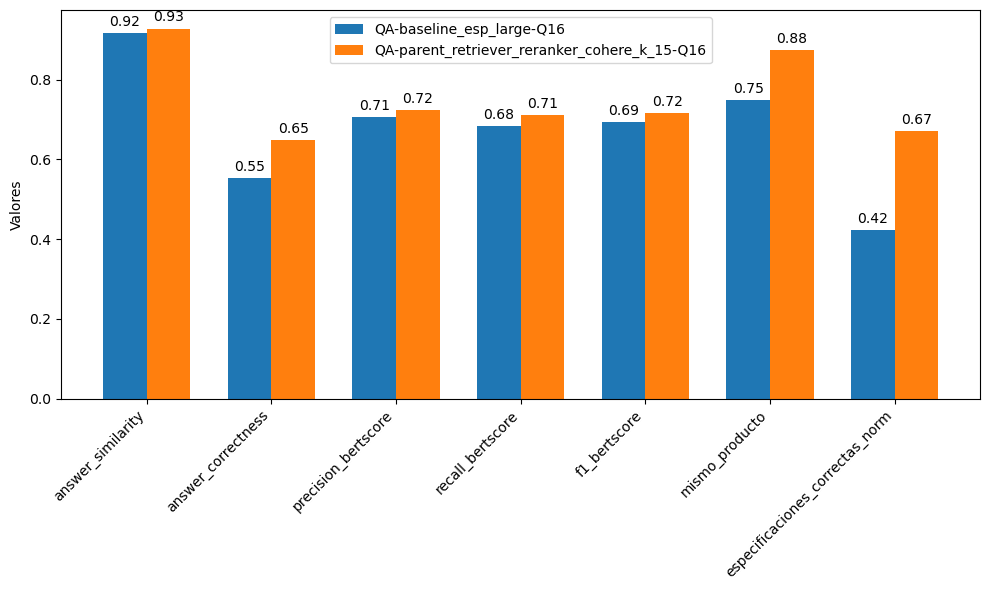

In [9]:
experimento1 = "baseline_esp_large"
experimento2 = "parent_retriever_reranker_cohere_k_15"

grafico_comparacion(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", ruta_grafico)

### Comparación entre rerankers

Cambiamos el baseline en esta sección (azul). Al comparar únicamente rerankers entre escogemos como baseline el reranker Cohere con los hiperparámetros por defecto.

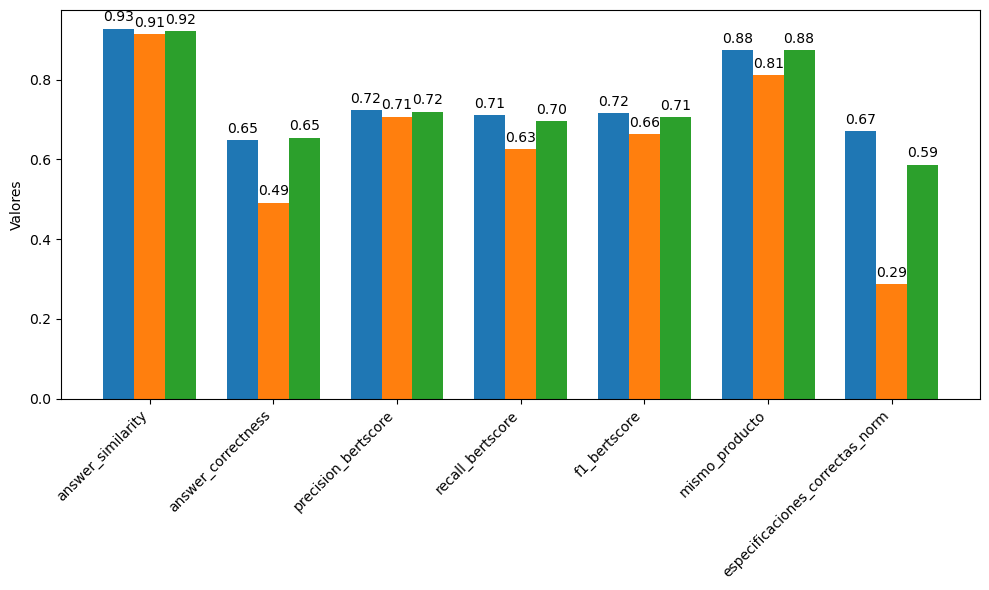

In [10]:
experimento1 = "parent_retriever_reranker_cohere_k_15"
experimento2 = "esp_large_reranker_cohere"
experimento3 = "pr_jinarerank_k_15"

grafico_comparacion3(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", f"QA-{experimento3}-Q16", ruta_grafico)

### Ajuste fino del modelo

El modelo que vamos a optimizar utiliza el como embedding el modelo largo de OpenAI, además de la técnica parent retriever y el reranker de Cohere.

Vamos a realizar un estudio entorno a tres parámetros: el numero de trozos de texto que recibe el reranker, el tamaño de los fragmentos padre y el tamaño de los fragmentos hijo.

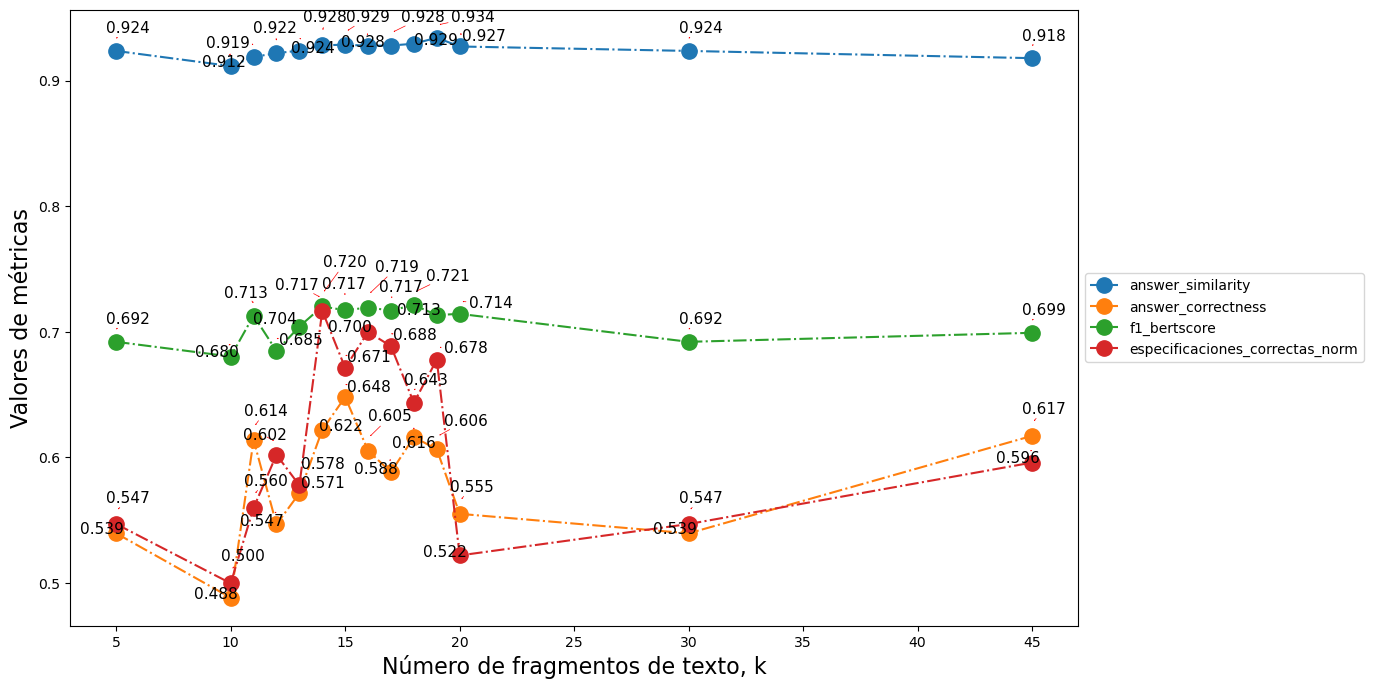

In [2]:
metricas = ['answer_similarity', 'answer_correctness', 'f1_bertscore', 'especificaciones_correctas_norm']
valores_k = [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 45]
nombre = "Comparación de métricas para distintos valores de k"
grafico_comparacion_continuo("QA-parent_retriever_reranker_cohere_k_", valores_k, nombre, metricas, ruta_grafico, x_name = "Número de fragmentos de texto, k")

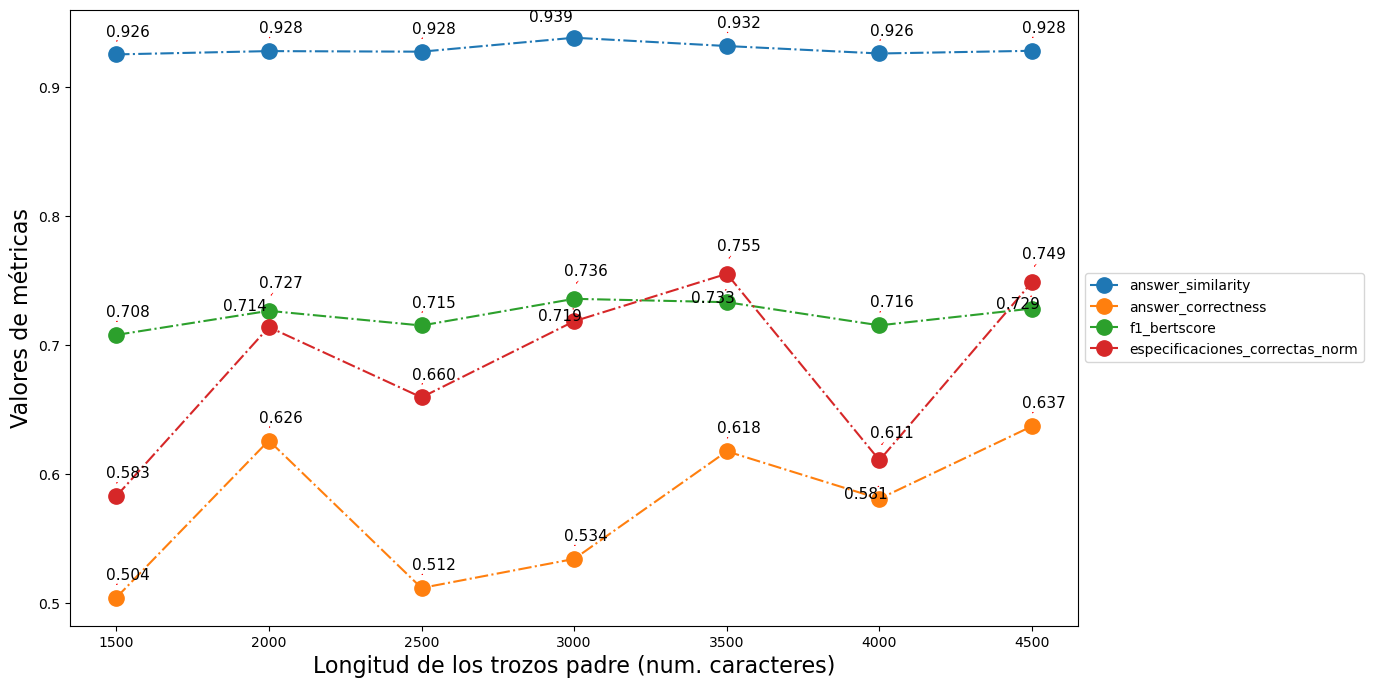

In [3]:
valores_k = range(1500, 5000, 500)
nombre = "Comparación de métricas para distintos tamaños de trozo del parent_splitter"
grafico_comparacion_continuo("QA-pr_cohere_k15_parentsize_", valores_k, nombre, metricas, ruta_grafico, x_name = "Longitud de los trozos padre (num. caracteres)")

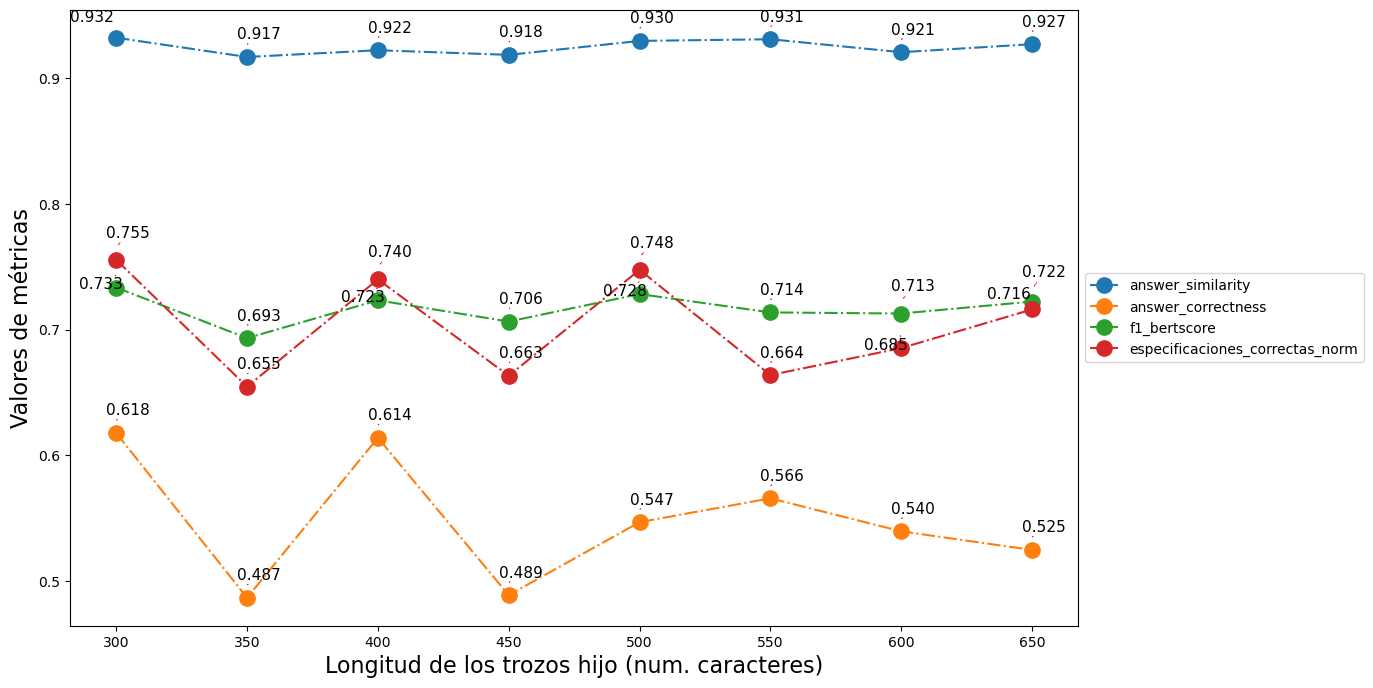

In [4]:
valores_k = range(300, 651, 50)
nombre = "Comparación de métricas para distintos tamaños de trozo del child_splitter"
grafico_comparacion_continuo("QA-pr_cohere_k15_parent3500_childsize_", valores_k, nombre, metricas, ruta_grafico, x_name = "Longitud de los trozos hijo (num. caracteres)")

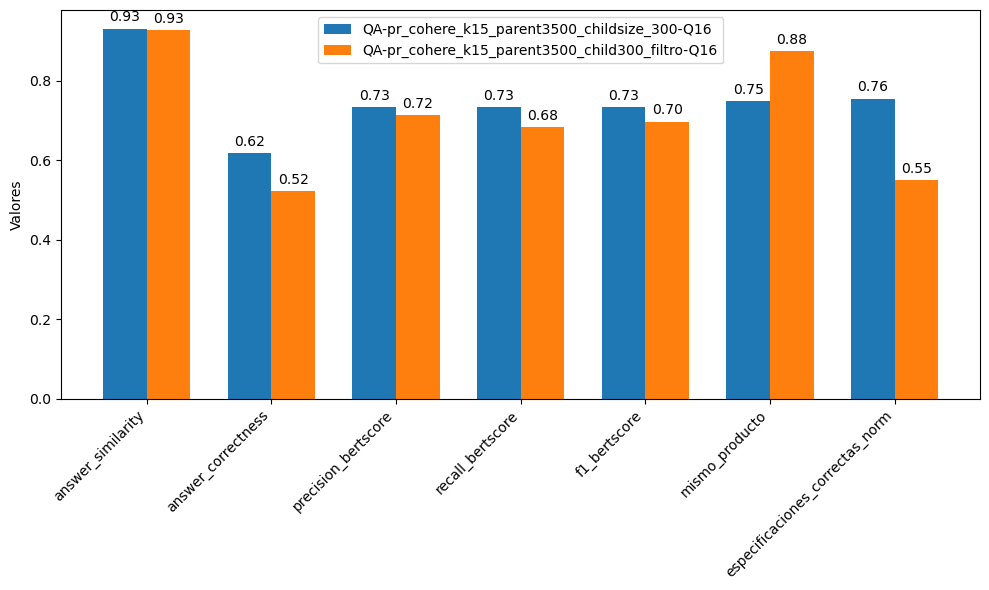

In [5]:
experimento1 = "pr_cohere_k15_parent3500_childsize_300"
experimento2 = "pr_cohere_k15_parent3500_child300_filtro"

grafico_comparacion(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", position_legend="best", ruta_grafico=ruta_grafico)

### Incorporación de un nuevo proyecto

Exploraremos como se comporta el modelo tras añadir un nuevo proyecto a la base de datos. El proyecto añadido es el referente a la zona de bajas emisiones de Mérida.

Tras terminar con toda la metodología necesaria, la base de datos pasa de X vectores a X+MERIDA vectores. Un aumento del %. Por otro lado, el conjunto de datos de test también aumenta de 16 a 34. Analizaremos por separado la calidad de las respuestas para las nuevas preguntas y para el conjunto global de forma separada.

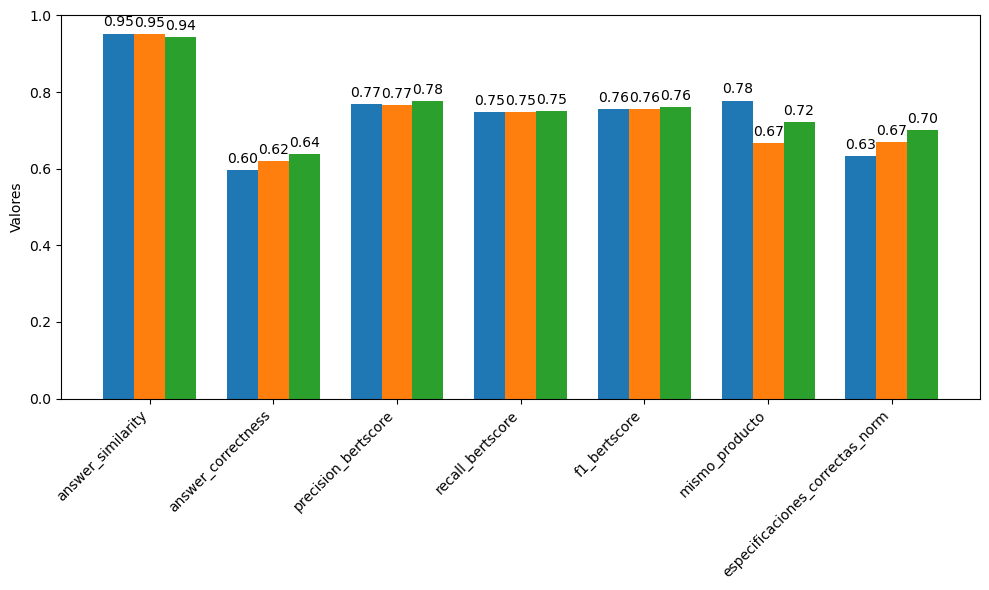

In [11]:
experimento1 = "baseline_esp"
experimento2 = "pr_cohere_k15_parent3500_childsize_300"
experimento3 = "moda_producto_global"

grafico_comparacion3(f"QA-{experimento1}-QMerida", f"QA-{experimento2}-QMerida", f"QA-{experimento3}-QMerida", ruta_grafico)

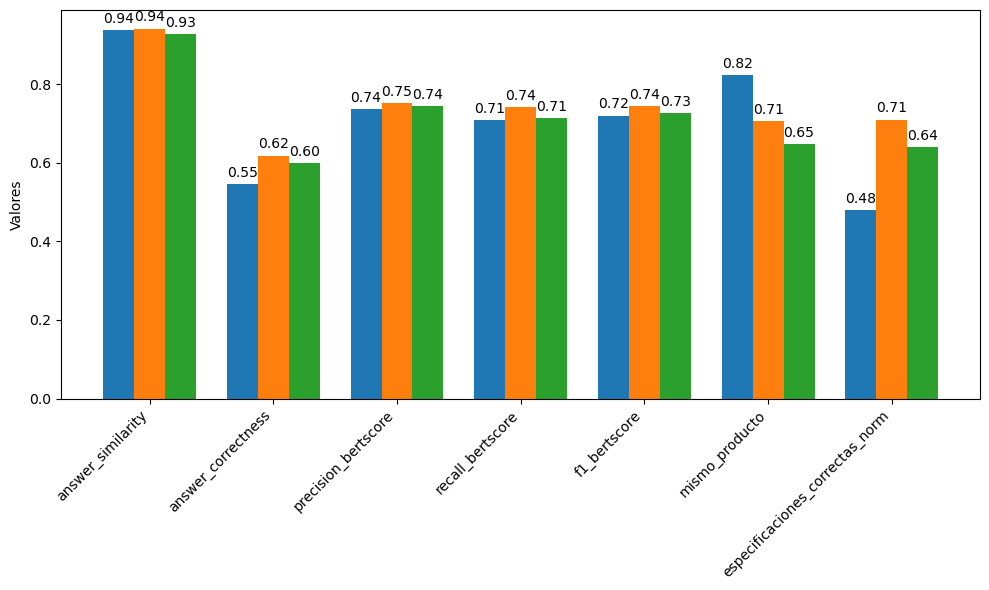

In [5]:
experimento1 = "baseline_esp"
experimento2 = "pr_cohere_k15_parent3500_childsize_300"
experimento3 = "moda_producto_global"

grafico_comparacion3(f"QA-{experimento1}-Q34", f"QA-{experimento2}-Q34", f"QA-{experimento3}-Q34", ruta_grafico)

### Modelo de ensemble

In [9]:
# Elegimos varibles lineales en función del coeficiente de correlación de Pearson

# p-value nos habla sobre la hipótesis que hacemos para calcular el coef.: 
# ambas muestras provienen de distribuciones gaussianas.
from scipy.stats import pearsonr
# calculamos pearsonr

variable1 = "norm_especificaciones_correctas"
y = df[variable1]
met = pd.DataFrame(columns=["variable", "pearson coef.", "p-value"])
for col in df.columns:
    if col == "nombre_modelo": continue
    t = df[col]
    pearson = pearsonr(y, t)
    print(F"pearsonr para {y.name} y {t.name}: {pearson.correlation:.4f}, p-value: {pearson.pvalue}")
    met.loc[len(met)] = [t.name, round(pearson.correlation, 4), pearson.pvalue]
met

pearsonr para norm_especificaciones_correctas y coste: 0.8254, p-value: 1.7099422262790247e-12
pearsonr para norm_especificaciones_correctas y answer_similarity: 0.6080, p-value: 7.390266953249283e-06
pearsonr para norm_especificaciones_correctas y answer_correctness: 0.6123, p-value: 6.128797346266269e-06
pearsonr para norm_especificaciones_correctas y precision_bert: 0.6266, p-value: 3.18447108535909e-06
pearsonr para norm_especificaciones_correctas y recall_bert: 0.8629, p-value: 1.2500597084168371e-14
pearsonr para norm_especificaciones_correctas y f1_bert: 0.8335, p-value: 6.544568002189067e-13
pearsonr para norm_especificaciones_correctas y mismo_producto: 0.0683, p-value: 0.6519926966658982
pearsonr para norm_especificaciones_correctas y especificaciones_correctas: 0.9911, p-value: 3.6831078210951265e-40
pearsonr para norm_especificaciones_correctas y norm_especificaciones_correctas: 1.0000, p-value: 0.0


,variable,pearson coef.,p-value
0,coste,0.8254,1.709942e-12
1,answer_similarity,0.6080,7.390267e-06
2,answer_correctness,0.6123,6.128797e-06
3,precision_bert,0.6266,3.184471e-06
4,recall_bert,0.8629,1.250060e-14
5,f1_bert,0.8335,6.544568e-13
6,mismo_producto,0.0683,6.519927e-01
7,especificaciones_correctas,0.9911,3.683108e-40
8,norm_especificaciones_correctas,1.0000,0.000000e+00


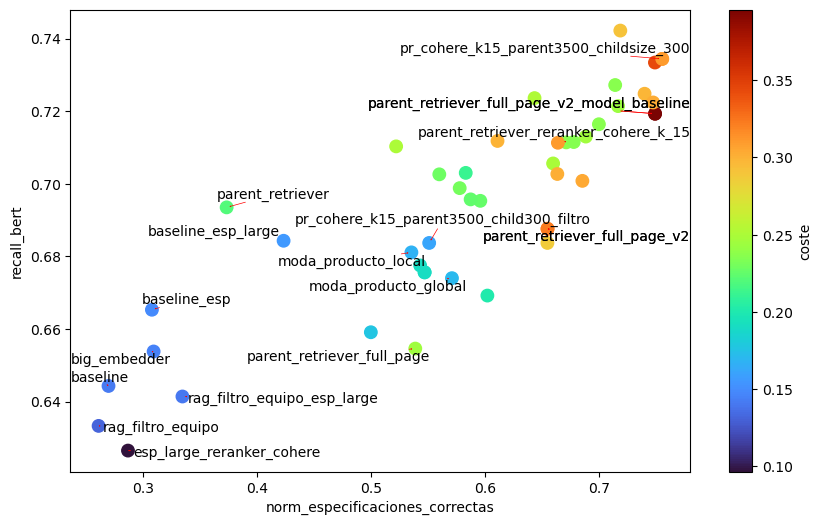

PearsonRResult(statistic=0.8629102426875794, pvalue=1.2500597084168371e-14)

In [4]:
NOPPPPP

x = df.norm_especificaciones_correctas
y = df.recall_bert
z = df.coste

comparacion_precio(df, x, y, z, ruta_grafico)
pearsonr(df.norm_especificaciones_correctas, df.recall_bert)

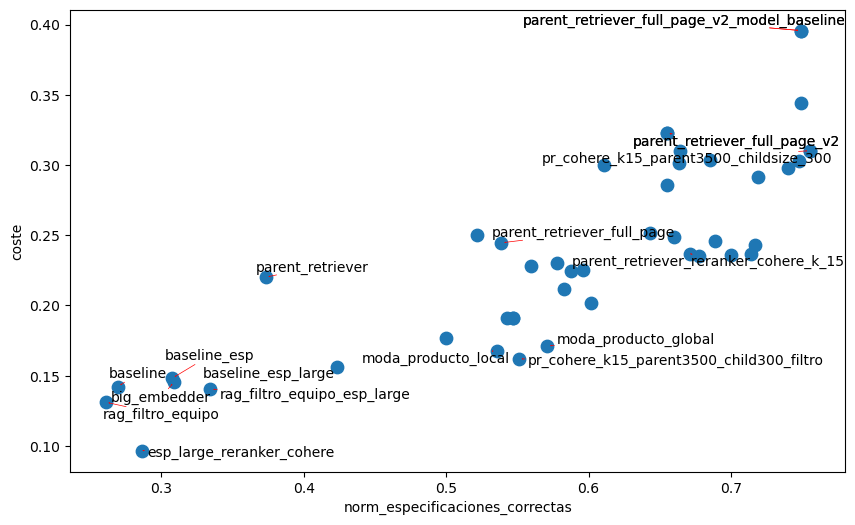

In [10]:
x = df.norm_especificaciones_correctas
y = df.coste

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y, s=80)
plt.xlabel(x.name)
plt.ylabel(y.name)
texts = [plt.text(x[i], y[i], df.nombre_modelo[i], ha='center', va='center') for i in range(len(x)) if re.search(r"_k", df.nombre_modelo[i]) == None]
texts.append(plt.text(x[17], y[17], df.nombre_modelo[17], ha='center', va='center')) # parent_retriever_reranker_cohere_k_15
texts.append(plt.text(x[38], y[38], df.nombre_modelo[38], ha='center', va='center')) # pr_cohere_k15_parent3500_childsize_300
texts.append(plt.text(x[45], y[45], df.nombre_modelo[45], ha='center', va='center')) # pr_cohere_k15_parent3500_child300_filtro      
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
# guardamos la fig
plt.savefig(f"{ruta_grafico}grafico_precio_especificaciones_{y.name}.png")
plt.show()


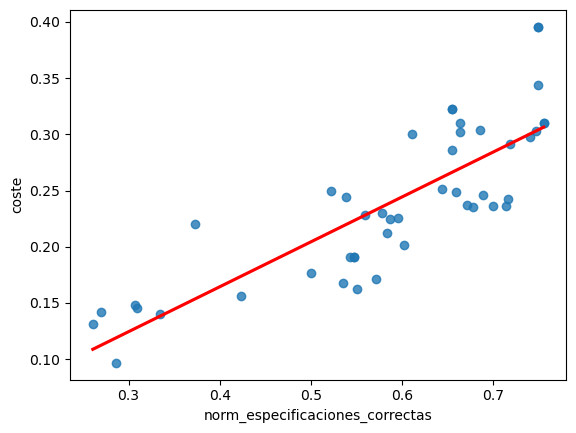

In [4]:
x = df.norm_especificaciones_correctas
y = df.coste
from sklearn.metrics import r2_score
sns.regplot(data=df, x="norm_especificaciones_correctas", y="coste", ci=None, line_kws={'color':'red'})
plt.savefig(f"{ruta_grafico}regplot_{x.name}_{y.name}.png")

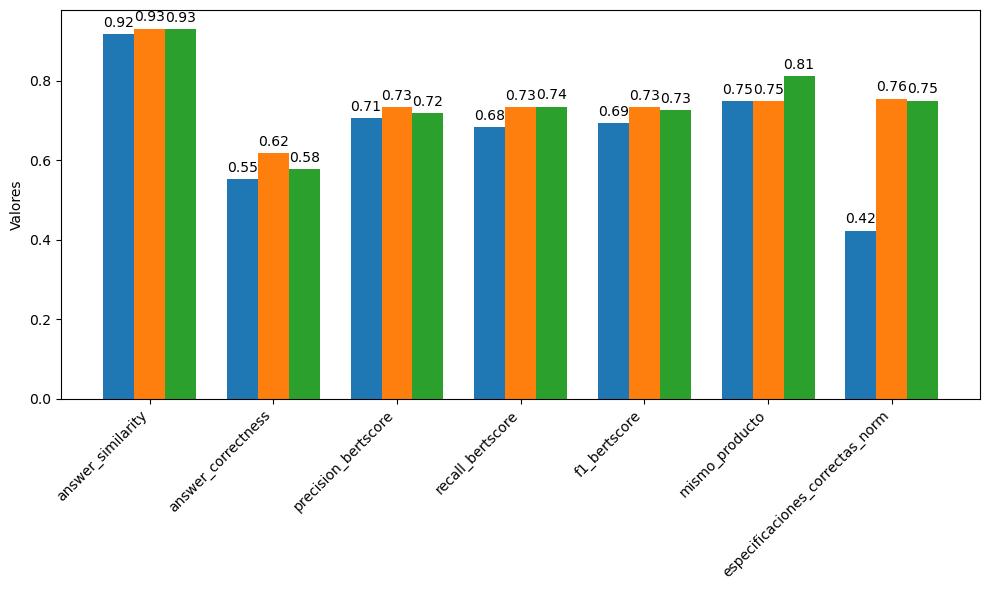

In [11]:
experimento1 = "baseline_esp_large"
experimento2 = "pr_cohere_k15_parent3500_childsize_300"
experimento3 = "rag_ensemble"

grafico_comparacion3(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", f"QA-{experimento3}-Q16", ruta_grafico)

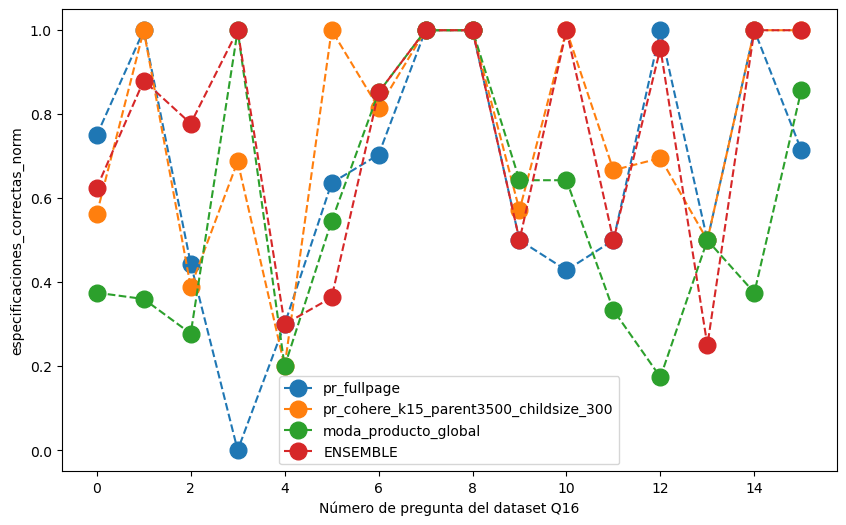

In [10]:
ruta_guardar = "C:/Users/jgpg000.edu/Desktop/Dataset/qa_generados/"
ensemble = ["parent_retriever_full_page_v2", "pr_cohere_k15_parent3500_childsize_300", "moda_producto_global"]
nombre_dataset = "Q16"
qa0 = QADataset(f"{ruta_guardar}QA-{ensemble[0]}-{nombre_dataset}.csv").show_metrics()
qa1 = QADataset(f"{ruta_guardar}QA-{ensemble[1]}-{nombre_dataset}.csv").show_metrics()
qa2 = QADataset(f"{ruta_guardar}QA-{ensemble[2]}-{nombre_dataset}.csv").show_metrics()
qaQ16 = QADataset(f"{ruta_guardar}QA-rag_ensemble-{nombre_dataset}.csv").show_metrics()
aciertos0 = qa0.especificaciones_correctas_norm
aciertos1 = qa1.especificaciones_correctas_norm
aciertos2 = qa2.especificaciones_correctas_norm
aciertos_final = qaQ16.especificaciones_correctas_norm

plt.figure(figsize=(10, 6))
plt.plot(aciertos0, "o--", markersize=12, label="pr_fullpage")
plt.plot(aciertos1, "o--", markersize=12, label="pr_cohere_k15_parent3500_childsize_300")
plt.plot(aciertos2, "o--", markersize=12, label="moda_producto_global")
plt.plot(aciertos_final, "o--", markersize=12, label="ENSEMBLE")
plt.xlabel("Número de pregunta del dataset Q16")
plt.ylabel("especificaciones_correctas_norm")
plt.legend()
plt.savefig(f"{ruta_grafico}RAG_ensemble_{nombre_dataset}.png")
plt.show()

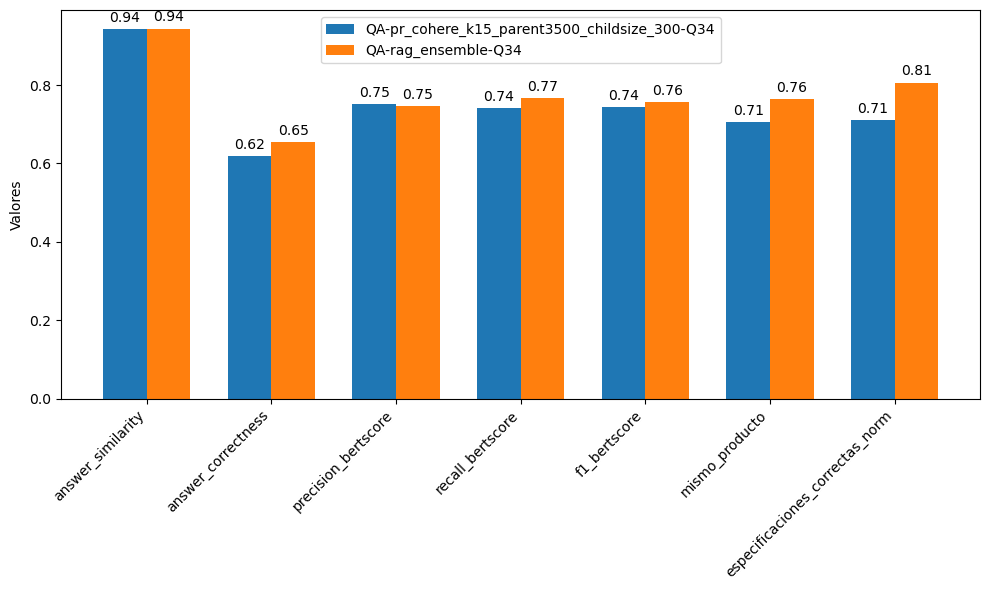

In [6]:
## QMERIDA y Q34
experimento1 = "baseline_esp_large"
experimento2 = "pr_cohere_k15_parent3500_childsize_300"
experimento3 = "rag_ensemble"
dataset= "Q34"

grafico_comparacion(f"QA-{experimento2}-{dataset}", f"QA-{experimento3}-{dataset}", position_legend = "upper center", ruta_grafico = ruta_grafico)